# Daub 5/3 integer-to-integer system

In [1]:
import numpy as np
import matplotlib.pyplot as plt

Импорт пользовательских функций.

In [2]:
from Functions.daub_5_3 import daub_5_3
from Functions.daub_5_3_lift import daub_5_3_lift
from Functions.user_functions import indx_even, d_func

In [3]:
#f = [1, -2, 6, 8]
f = np.random.randint(low=-10, high=11, size=8)

## Прямое преобразование

In [4]:
N = len(f)
d = [0] * (N//2)
a = [0] * (N//2)

In [5]:
for k in range(N//2):
    d[k] = d_func(k, f, N, int_flag=False)
    a[k] = f[indx_even(2*k,N)] + (d_func(k-1, f, N, int_flag=False) + d[k])/4
    #a[k] = -1/8*(f[indx_even(2*k-2,N)] + f[indx_even(2*k+2,N)]) + 1/4*(f[indx_even(2*k-1,N)] + f[indx_even(2*k+1,N)]) + 3/4*f[indx_even(2*k,N)]
print('a', a)
print('d', d)

a [0.75, 1.875, 7.375, -2.625]
d [11.5, -4.0, -6.5, 0.0]


## Обратное преобразование

In [6]:
f_rec = [0] * N
# Odd values.
for k in range(N//2):
    f_rec[2*k] = a[k] - (d_func(k-1, f, N, int_flag=False) + d[k])/4

# Even values.
for k in range(N//2):
    f_rec[2*k+1] = d[k] + (f[2*k] + f[indx_even(2*k+2,N)])/2
print(f)
print(f_rec)

[-5  9  0  1 10 -2 -1 -1]
[-5.0, 9.0, 0.0, 1.0, 10.0, -2.0, -1.0, -1.0]


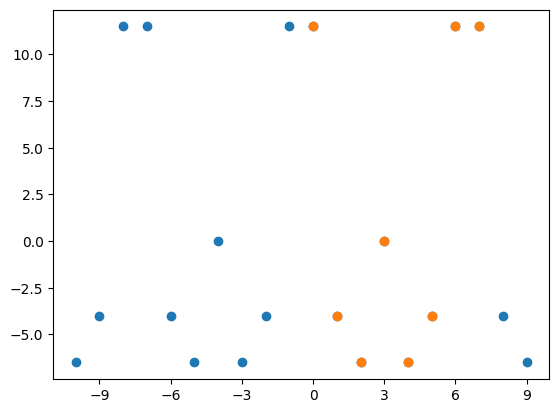

In [7]:
n_gr = []
d_gr = []
for k in range(-10,10):
    n_gr.append(k)
    d_gr.append(d_func(k, f, N, int_flag=False))
n_gr_N = []
d_gr_N = []

for k in range(N):
    n_gr_N.append(k)
    d_gr_N.append(d_func(k, f, N, int_flag=False))
    
import matplotlib.ticker as ticker
# Create plot
fig, ax = plt.subplots()
ax.plot(n_gr, d_gr, 'o')
ax.plot(n_gr_N, d_gr_N, 'o')

# Force integer ticks on x-axis
ax.xaxis.set_major_locator(ticker.MaxNLocator(integer=True))

plt.show()

## Прямое и обратное преобразование при помощи матричных операций

In [8]:
Mdir = np.matrix(np.concatenate(daub_5_3(N), axis = 0))
tr = np.matrix(f)*(Mdir.T)
Mrev = np.linalg.inv(Mdir).T
print('Wavelet coefficients:', tr.tolist()[0])
print('Reconstruction:', (tr * Mrev).tolist()[0])
print('Original:', f)

Wavelet coefficients: [0.75, 1.875, 7.375, -2.625, 11.5, -4.0, -6.5, 0.0]
Reconstruction: [-5.0, 9.0, 0.0, 1.0, 10.0, -2.0, -1.0, -1.0]
Original: [-5  9  0  1 10 -2 -1 -1]


In [9]:
np.round(Mdir)

matrix([[ 1.,  0., -0.,  0.,  0.,  0.,  0.,  0.],
        [-0.,  0.,  1.,  0., -0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  0.,  1.,  0., -0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  0.,  1.,  0.],
        [-0.,  1., -0.,  0.,  0.,  0.,  0.,  0.],
        [ 0.,  0., -0.,  1., -0.,  0.,  0.,  0.],
        [ 0.,  0.,  0.,  0., -0.,  1., -0.,  0.],
        [ 0.,  0.,  0.,  0.,  0.,  0., -1.,  1.]])

## Целочисленные преобразования

Созданы функции lifting-преобразования.

In [10]:
# float-преобразование.
coeff_float = daub_5_3_lift(f, int_flag=False)
print(coeff_float)

# int-преобразование.
coeff_int = daub_5_3_lift(f, int_flag=True)
print(coeff_int)

[0.75, 1.875, 7.375, -2.625, 11.5, -4.0, -6.5, 0.0]
[1, 2, 7, -3, 12, -4, -6, 0]


Обратное преобразование, также по lifting-схеме.